In [1]:
import numpy as np
from scipy.stats import rv_discrete
from matplotlib import pyplot as plt
import cvxpy as cp
import pickle
# import gurobipy

In [5]:
grid_size = 10
time_steps = 15
cust_arrivals_x = np.random.uniform(low=0, high=grid_size, size=time_steps)
cust_arrivals_y = np.random.uniform(low=0, high=grid_size, size=time_steps)
# cust_arrivals = np.column_stack((x_coords, y_coords))
serv_arrivals_x = np.random.uniform(low=0, high=grid_size, size=time_steps)
serv_arrivals_y = np.random.uniform(low=0, high=grid_size, size=time_steps)

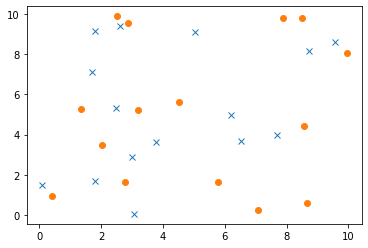

In [6]:
plt.plot(cust_arrivals_x,cust_arrivals_y, 'x')
plt.plot(serv_arrivals_x,serv_arrivals_y, 'o')

In [17]:
customers = []
servers = []
customers.append([cust_arrivals_x[0],cust_arrivals_y[0]])
customers.append([cust_arrivals_x[1],cust_arrivals_y[1]])
servers.append([serv_arrivals_x[0],serv_arrivals_y[0]])
servers.append([serv_arrivals_x[1],serv_arrivals_y[1]])

In [18]:
coords1 = np.array(customers)
coords2 = np.array(servers)
diff = coords1[:, np.newaxis, :] - coords2[np.newaxis, :, :]

In [19]:
diff.shape

(2, 2, 2)

In [20]:
weights = np.sqrt(np.sum(diff**2, axis=-1))
print(weights)

[[7.37350546 6.79513685]
 [4.86188431 2.78837591]]


In [21]:
diff

array([[[-6.86017217,  2.70307612],
        [-4.05690389,  5.45118479]],

       [[-4.7959968 , -0.7977053 ],
        [-1.99272851,  1.95040337]]])

In [36]:
Tbatch = 3

cust_arrivals_x = np.random.uniform(low=0, high=grid_size, size=time_steps)
cust_arrivals_y = np.random.uniform(low=0, high=grid_size, size=time_steps)
# cust_arrivals = np.column_stack((x_coords, y_coords))
serv_arrivals_x = np.random.uniform(low=0, high=grid_size, size=time_steps)
serv_arrivals_y = np.random.uniform(low=0, high=grid_size, size=time_steps)

customers = []
servers = []

customers.append([cust_arrivals_x[0],cust_arrivals_y[0]])
servers.append([serv_arrivals_x[0],serv_arrivals_y[0]])

cost_path = [0]
total_queue = []
total_queue.append(len(customers))

count = 0

for k in range(1,time_steps):
    queue_length = len(customers)
    Mstar = np.zeros(shape=(queue_length,queue_length))
    W = np.zeros(shape=(queue_length,queue_length))
    # Batching
    if k%Tbatch == 0:
        N = len(customers)
        M = cp.Variable((N,N),boolean=True)
        constraints = []
        for i in range(N):
            # Match customer i with 1 server
            constraints.append( cp.sum(M[i,:]) == 1 )
            # Match server i with 1 customer
            constraints.append( cp.sum(M[:,i]) == 1 )
        constraints.append( M[:,:]>=0 )
        
        coords1 = np.array(customers)
        coords2 = np.array(servers)
        diff = coords1[:, np.newaxis, :] - coords2[np.newaxis, :, :]
        W = np.sqrt(np.sum(diff**2, axis=-1))
        objective = cp.Minimize( cp.sum( cp.multiply( W, M ) ) )
        
        problem  = cp.Problem(objective, constraints)
        problem.solve(solver="GLPK_MI")
        
        Mstar = M.value
        print("iteration",k)
        print("Customers", customers)
        print("Servers", servers)
        
        customers = []
        servers = []

    customers.append([cust_arrivals_x[k],cust_arrivals_y[k]])
    servers.append([serv_arrivals_x[k],serv_arrivals_y[k]])

    matching_cost = np.sum( np.multiply( W, Mstar ) )

    total_queue.append(len(customers))
    cost_path.append(matching_cost)

iteration 3
Customers [[6.100530051435383, 2.2112582863900365], [2.5413458706900895, 2.1921111084827762], [0.49975432868331726, 8.450140764845743]]
Servers [[1.787826691115536, 8.697707477124766], [3.7038646133415343, 5.28631324914574], [3.631388861204253, 7.33093733900573]]
iteration 6
Customers [[7.742855166157386, 4.320834913573988], [8.026637787174417, 0.06836932824301423], [4.39181153048175, 3.0537935233995492]]
Servers [[2.4326296512139614, 5.052192433781697], [8.171088646346726, 9.621019278223217], [9.46669436366471, 6.969705002320573]]
iteration 9
Customers [[5.0009446127660695, 9.148023811666437], [1.5175728838697033, 9.16085173136697], [5.864376930548113, 5.35955164325003]]
Servers [[3.5566832342070223, 4.009938227556445], [1.53494178938949, 5.904813200714388], [5.65836959848732, 9.407068279549994]]
iteration 12
Customers [[5.147309471969358, 5.194080467151768], [3.0881156914242567, 1.3882391107418446], [7.41333139175893, 6.975338972886714]]
Servers [[7.885861319743377, 9.377

In [31]:
total_queue

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]

In [32]:
cost_path

[0,
 0.0,
 0.0,
 13.439185031032114,
 0.0,
 0.0,
 15.46185738447516,
 0.0,
 0.0,
 8.515095464477,
 0.0,
 0.0,
 11.56960006904361,
 0.0,
 0.0]